Table or dataset showing number of registered users and the number of click these users make and average they place

In [ ]:
import pandas as pd

users = pd.read_csv('/content/users.csv')
events = pd.read_csv('/content/events.csv')
order_items = pd.read_csv('/content/order_items.csv')



In [ ]:
events['created_at'] = pd.to_datetime(events['created_at'], errors='coerce')
users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')


In [ ]:
events_orders_join = events.merge(order_items, how='left', on='user_id')

print(events_orders_join.shape)
print(events_orders_join.head())


(3737395, 23)
      id_x  user_id  sequence_number                            session_id  \
0  1597778      NaN                3  442bed98-dec1-4209-affc-2c3808e895c7   
1  1562697      NaN                3  120df813-6532-4c67-8c7c-b84ed21f68d1   
2  2223079      NaN                3  2fab5c07-d15e-4837-b5e8-6f0af78740e7   
3  2301569      NaN                3  8c7883c0-5b4a-4564-9561-d12a48940e0b   
4  2404161      NaN                3  4e287369-f060-4dec-9484-b88b415cd203   

              created_at_x      ip_address       city      state postal_code  \
0  2024-04-07 13:34:00 UTC  92.103.239.244  São Paulo  São Paulo   02220-000   
1  2023-02-22 05:52:00 UTC  93.176.140.154  São Paulo  São Paulo   02675-031   
2  2019-08-31 13:27:00 UTC  186.247.42.109  São Paulo  São Paulo   02675-031   
3  2020-10-31 02:49:00 UTC  116.177.189.60  São Paulo  São Paulo   02675-031   
4  2022-12-02 08:54:00 UTC    18.53.26.139  São Paulo  São Paulo   02675-031   

   browser  ... id_y order_id produc

In [ ]:
total_clicks_per_user = events.groupby('user_id')['id'].count().reset_index()
total_clicks_per_user.columns = ['user_id', 'total_clicks']
print(total_clicks_per_user.head())


   user_id  total_clicks
0      1.0             5
1      2.0             5
2      3.0            10
3      4.0            20
4      5.0             5


In [ ]:
total_clics = events['user_id'].count()

print(f"Total Clicks: {total_clics}")


Total Clicks: 1295964


In [ ]:
total_sales = order_items['order_id'].count()

print(f"Total Sales: {total_sales}")


Total Sales: 181461


In [ ]:
events_orders_join = events.merge(order_items, how='left', on='user_id')
total_clicks = total_clics = events['user_id'].count()
print(f"Total Clicks: {total_clicks}")

total_sales = order_items['order_id'].count()
print(f"Total Sales: {total_sales}")

total_users = events_orders_join['user_id'].nunique()

average_clicks_per_user = total_clicks / total_users
print(f"Average Clicks per User: {average_clicks_per_user:.2f}")
average_sales_per_user = total_sales / total_users
print(f"Average Sales per User: {average_sales_per_user:.2f}")



Total Clicks: 1295964
Total Sales: 181461
Average Clicks per User: 16.20
Average Sales per User: 2.27


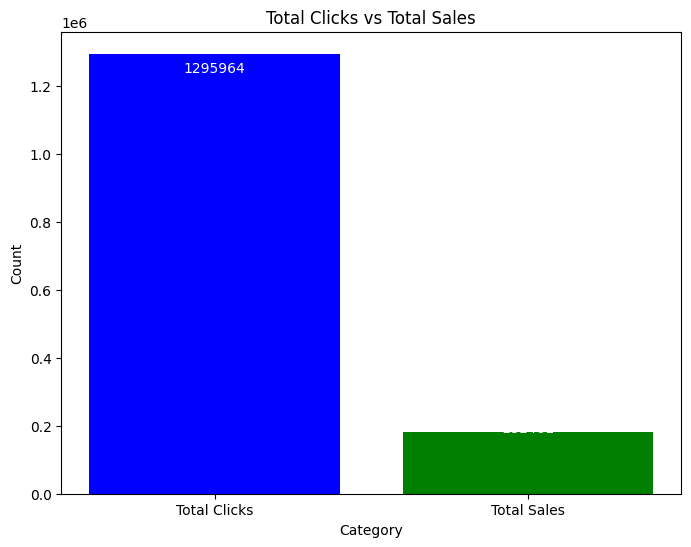

In [ ]:
categories = ['Total Clicks', 'Total Sales']
values = [total_clicks, total_sales]
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['blue', 'green'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.05*yval, int(yval), ha='center', va='bottom', color='white')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Total Clicks vs Total Sales')
plt.show()
